Neste notebook exploramos a função $\beta(x)$, densidade total de natalidade, observando seu comportamento baseado nas equações que englobarão o sistema de equações OMD para populações sexuadas.

### Definindo parâmetros

$
\overline{z_1}=0 \\
\overline{z_2}=1 \\
\sigma_f = 0.1 \\
\sigma_1 = 0.1 \\
\sigma_2 = 0.1 \\
V_1 = 0.01 \\
V_2 = 0.01 \\
f_1 = 0.5 \\
f_2 = 0.5
$

caso1: $\sigma_A = 0.01$

Caso 1: $\sigma_A = 0.1$

Caso 2: $\sigma_A = 1$

In [1]:
#Importando bibliotecas

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz

In [13]:
#Definindo valores dos parâmetros

zbarra1 = 0
zbarra2 = 1
sigmaf = 0.001
sigma1 = 0.1
sigma2 = 0.1
V1 = sigma1**2
V2 = sigma2**2
f1 = 1/2
f2 = 1/2

#Valores examinados de sigmaA

#sigmaA = 0.01
#sigmaA = 0.1
sigmaA = 1

### Escrevendo o modelo

Para melhor visualização, as equações que serão escritas no código a seguir provem da seguinte equação

\begin{equation}
\dfrac{\sum^M_{i,j=1}f_if_j\dfrac{T_{0j}}{\sqrt{2V_i\Omega_{2j}}}\;e^{-\dfrac{\overline{z_i}^2}{2V_i} + \dfrac{\Gamma_{10j}^2}{4\Omega_{2j}} - \Gamma_{00j} + \left(\dfrac{\overline{z_i}}{V_i} + \dfrac{\Gamma_{10j}\Gamma_{11j}}{2\Omega_{2j}}- \Gamma_{01j} \right) u +\left(\dfrac{-1}{2V_i} + \dfrac{\Gamma_{11j}^2}{4\Omega_{2j}}- \Gamma_{02j} \right)u^2 }}{\sum^M_{i=1}f_iT_{1i}\dfrac{\sqrt{\pi}}{\sqrt{\Omega_{5i}}}\;e^{\dfrac{\Gamma_{40i}^2}{4\Omega_{5i}}-\Gamma_{30i}+\dfrac{\Gamma_{40i}\Gamma_{41i}}{2\Omega_{5i}}u + \left(\dfrac{\Gamma_{41i}^2}{4\Omega_{5i}} - \Gamma_{32i} \right)u^2 }}
\end{equation}


"funcaon1" é representado pela equação a seguir com $i=1$ e $j=1$, "funcaon2" com $i=1$ e $j=2$, "funcaon3" com $i=2$ e $j=2$

\begin{equation}
\dfrac{T_{0j}}{\sqrt{2V_i\Omega_{2j}}}\;e^{-\dfrac{\overline{z_i}^2}{2V_i} + \dfrac{\Gamma_{10j}^2}{4\Omega_{2j}} - \Gamma_{00j} + \left(\dfrac{\overline{z_i}}{V_i} + \dfrac{\Gamma_{10j}\Gamma_{11j}}{2\Omega_{2j}}- \Gamma_{01j} \right) u +\left(\dfrac{-1}{2V_i} + \dfrac{\Gamma_{11j}^2}{4\Omega_{2j}}- \Gamma_{02j} \right)u^2 }
\end{equation}

"funcaod1" é representado pela equação a seguir com $i=1$ e "funcaod2" com $i=2$

\begin{equation}
T_{1i}\dfrac{\sqrt{\pi}}{\sqrt{\Omega_{5i}}}\;e^{\dfrac{\Gamma_{40i}^2}{4\Omega_{5i}}-\Gamma_{30i}+\dfrac{\Gamma_{40i}\Gamma_{41i}}{2\Omega_{5i}}u + \left(\dfrac{\Gamma_{41i}^2}{4\Omega_{5i}} - \Gamma_{32i} \right)u^2 }
\end{equation}

In [14]:
#Definindo equações

def total(x, u):
    T01 = 1/(4*np.pi**2*V1**(1/2)*sigmaA**2*sigmaf)
    T02 = 1/(4*np.pi**2*V2**(1/2)*sigmaA**2*sigmaf)
    T11 = 1/((2*np.pi)**(1/3)*(V1)**(1/2)*sigmaA**2)
    T12 = 1/((2*np.pi)**(1/3)*(V2)**(1/2)*sigmaA**2)
    Omega21 = 1/(8*sigmaf**2) + sigmaA**(-2) + 1/(2*V1)
    Omega22 = 1/(8*sigmaf**2) + sigmaA**(-2) + 1/(2*V2)
    Omega51 = sigmaA**(-2) + 1/(2*V1)
    Omega52 = sigmaA**(-2) + 1/(2*V2)
    Gamma001 = x**2/(2*sigmaf**2) + zbarra1**2/(2*V1)
    Gamma002 = x**2/(2*sigmaf**2) + zbarra2**2/(2*V2)

    Gamma011 = -x/(2*sigmaf**2)
    Gamma012 = Gamma011
    Gamma101 = -x/(2*sigmaf**2) - zbarra1/V1
    Gamma102 = -x/(2*sigmaf**2) - zbarra2/V2

    Gamma021 = 1/(8*sigmaf**2) + sigmaA**(-2)
    Gamma022 = Gamma021
    Gamma111 = 1/(4*sigmaf**2) - 2/sigmaA**2
    Gamma112 = 1/(4*sigmaf**2) - 2/sigmaA**2
    Gamma301 = zbarra1**2/(2*V1)
    Gamma302 = zbarra2**2/(2*V2)
    Gamma321 = sigmaA**(-2)
    Gamma322 = Gamma321 
    Gamma401 = -zbarra1/V1
    Gamma402 = -zbarra2/V2 
    Gamma411 = -2/sigmaA**2
    Gamma412 = Gamma411
    funcaon1 = T01*np.e**(-Gamma001 + Gamma101**2/(4*Omega21) + u**2*(-Gamma021 + Gamma111**2/(4*Omega21) - 1/(2*V1)) + u*(-Gamma011 + Gamma101*Gamma111/(2*Omega21) + zbarra1/V1) - zbarra1**2/(2*V1))/np.sqrt(2*V1*Omega21)
    funcaon2 = T02*np.e**(-Gamma002 + Gamma102**2/(4*Omega22) + u**2*(-Gamma022 + Gamma112**2/(4*Omega22) - 1/(2*V1)) + u*(-Gamma012 + Gamma102*Gamma112/(2*Omega22) + zbarra1/V1) - zbarra1**2/(2*V1))/np.sqrt(2*V1*Omega22)
    funcaon3 = T02*np.e**(-Gamma002 + Gamma102**2/(4*Omega22) + u**2*(-Gamma022 + Gamma112**2/(4*Omega22) - 1/(2*V2)) + u*(-Gamma012 + Gamma102*Gamma112/(2*Omega22) + zbarra2/V2) - zbarra2**2/(2*V2))/np.sqrt(2*V2*Omega22)
    funcaod1 = T11*np.sqrt(np.pi)*np.e**(-Gamma301 + Gamma401**2/(4*Omega51) + Gamma401*Gamma411*u/(2*Omega51) + u**2*(-Gamma321 + Gamma411**2/(4*Omega51)))/np.sqrt(Omega51)
    funcaod2 = T12*np.sqrt(np.pi)*np.e**(-Gamma302 + Gamma402**2/(4*Omega52) + Gamma402*Gamma412*u/(2*Omega52) + u**2*(-Gamma322 + Gamma412**2/(4*Omega52)))/np.sqrt(Omega52)
    return (f1*f1*funcaon1+f1*f2*funcaon2+f2*f2*funcaon3)/(f1*funcaod1+f2*funcaod2), funcaon1, funcaon2, funcaon3, funcaod1, funcaod2, f1*funcaon1/funcaod1+f2*funcaon3/funcaod2

In [15]:
#Criando uma grade

u = np.arange(-0.5, 1.5, 0.01)
x = np.arange(-0.5, 1.5, 0.01)

grid = np.meshgrid(x, u)

T = total(grid[0], grid[1])

### Visualização do modelo

Neste ponto verificaremos como é o comportamento da função $\beta(x)$. Primeiramente estaremos tratando de todos os traços presentes no intervalo escolhido, depois mostraremos apenas as contribuições dos morfos que serão usados no sistema completo de equações (tratado em outro notebook), assim podemos ver o tipo de comportamento que o modelo OMD para populações sexuadas pode seguir baseado em $\beta(x)$, dado que esta é peça fundamental para o sistema. Examinaremos estes comportamentos para diferentes valores de $\sigma_A$.

C:\Users\danie\AppData\Local\Temp\ipykernel_9184\3291071294.py:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(x, u, np.log(T[0]), vmin = -100)


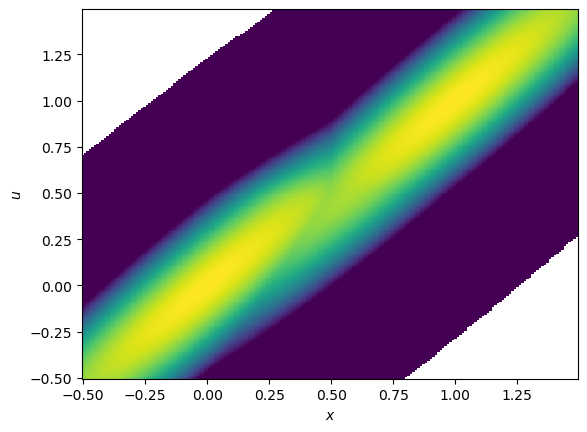

In [42]:
#Contribuição de todo o intervalo, cores mais claras representam pontos de maior valor

plt.pcolor(x, u, np.log(T[0]), vmin = -100)
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

C:\Users\danie\AppData\Local\Temp\ipykernel_9184\2175784313.py:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(x, u, np.log(T[6]), vmin = -100)


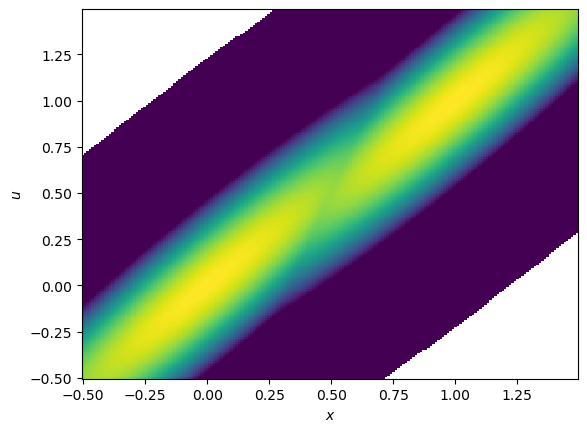

In [43]:
#Contribuição apenas dos picos

plt.pcolor(x, u, np.log(T[6]), vmin = -100)
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

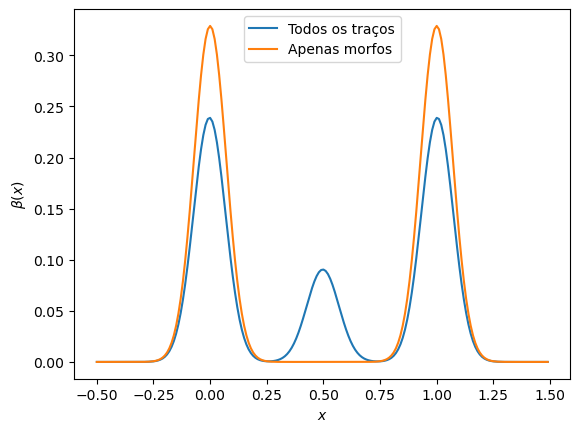

In [16]:
#Gráficos de densidade total de natalidade vs traços
#T[0] representa a função beta com contribuições de todos os traços
#T[6] representa a função beta com contribuições dos morfos


plt.plot(x, np.apply_along_axis(trapz, 0, T[0], dx = 0.01), label="Todos os traços")
plt.plot(x, np.apply_along_axis(trapz, 0, T[6], dx = 0.01), label="Apenas morfos")
plt.legend()
plt.xlabel(r"$x$")
plt.ylabel(r"$\beta(x)$")

C:\Users\danie\AppData\Local\Temp\ipykernel_9184\2364040095.py:3: RuntimeWarning: divide by zero encountered in log
  plt.pcolor(x, u, np.log(np.abs(T[0]-T[6])))


Valor máximo da diferença entre pontos dos modelos: 6.686057471099714e-06


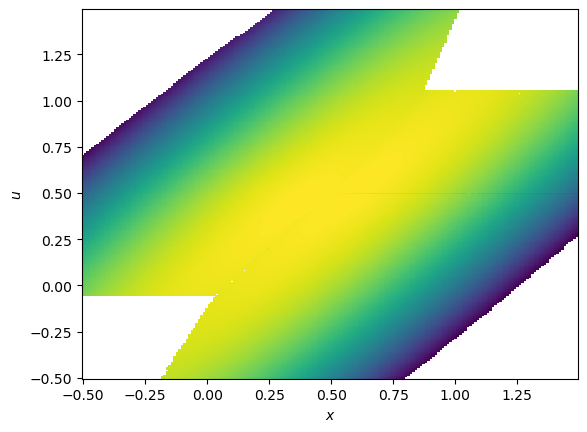

In [45]:
#Diferença entre os gráficos

plt.pcolor(x, u, np.log(np.abs(T[0]-T[6])))
plt.xlabel(r"$x$")
plt.ylabel(r"$u$")
difabs = np.abs(T[0]-T[6]).max()
print("Valor máximo da diferença entre pontos dos modelos: "+str(difabs))